In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Create some Data

In [0]:
from sklearn.datasets import make_blobs

In [0]:
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)

In [4]:
type(data), len(data)

(tuple, 2)

In [5]:
data[0][:2] #coordinates

array([[  0.99429187,   0.87511711,  -9.99909683],
       [  0.65761885,   0.91624771, -10.18458517]])

In [6]:
data[1][:2] #classes

array([0, 0])

### Scale the Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
scaled_data = scaler.fit_transform(data[0])

In [0]:
data_x = scaled_data[:, 0]
data_y = scaled_data[:, 1]
data_z = scaled_data[:, 2]

In [0]:
from mpl_toolkits.mplot3d import Axes3D

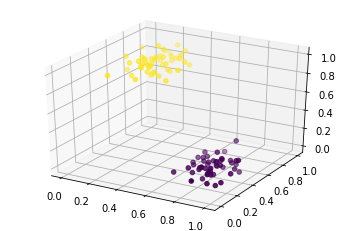

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_x, data_y, data_z, c=data[1])

### The Linear Autoencoder

In [0]:
import tensorflow as tf

In [0]:
num_inputs = 3 #3 dimensional 
num_hidden = 2 #reduce to 2 dimensional
num_outputs = num_inputs #for autoencoder

learning_rate = 0.01

In [0]:
x = tf.placeholder(tf.float32, shape = [None, num_inputs])

Layers using the fully connected layer API (wights and biases are all handled properly). No activation for the PCA analogy

In [16]:
hidden = tf.contrib.layers.fully_connected(x, num_hidden, activation_fn=None)
outputs = tf.contrib.layers.fully_connected(hidden, num_outputs, activation_fn=None)

W0619 17:54:51.944718 140354703906688 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### Loss Function

In [0]:
loss = tf.reduce_mean(tf.square(outputs-x))

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

### Session

In [0]:
init = tf.global_variables_initializer()

In [0]:
num_steps = 1000
with tf.Session() as sess:
    sess.run(init)
    for iteration in range(num_steps):
        sess.run(train, {x: scaled_data})
    
    output_2d = sess.run(hidden, {x: scaled_data})

In [34]:
output_2d.shape

(100, 2)

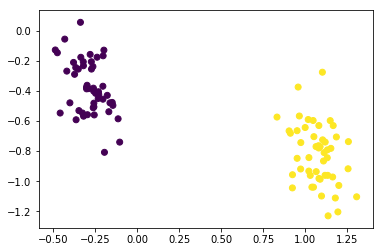

In [35]:
plt.scatter(output_2d[:, 0], output_2d[:, 1], c = data[1])